## Decision Tree DATASET1

In [1]:
# Load libraries
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn import tree
from matplotlib import pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score


In [2]:
#Loading Dataset
df = pd.read_csv("project3_dataset1.txt",sep='\t',header=None)
features_column  = df.iloc[: , :30]
X = features_column
y = df[30]

In [3]:
#Model training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)
clf_report = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))
clf_report

,0,1,accuracy,macro avg,weighted avg
precision,0.954128,0.903226,0.935673,0.928677,0.935970
recall,0.945455,0.918033,0.935673,0.931744,0.935673
f1-score,0.949772,0.910569,0.935673,0.930170,0.935787
support,110.000000,61.000000,0.935673,171.000000,171.000000


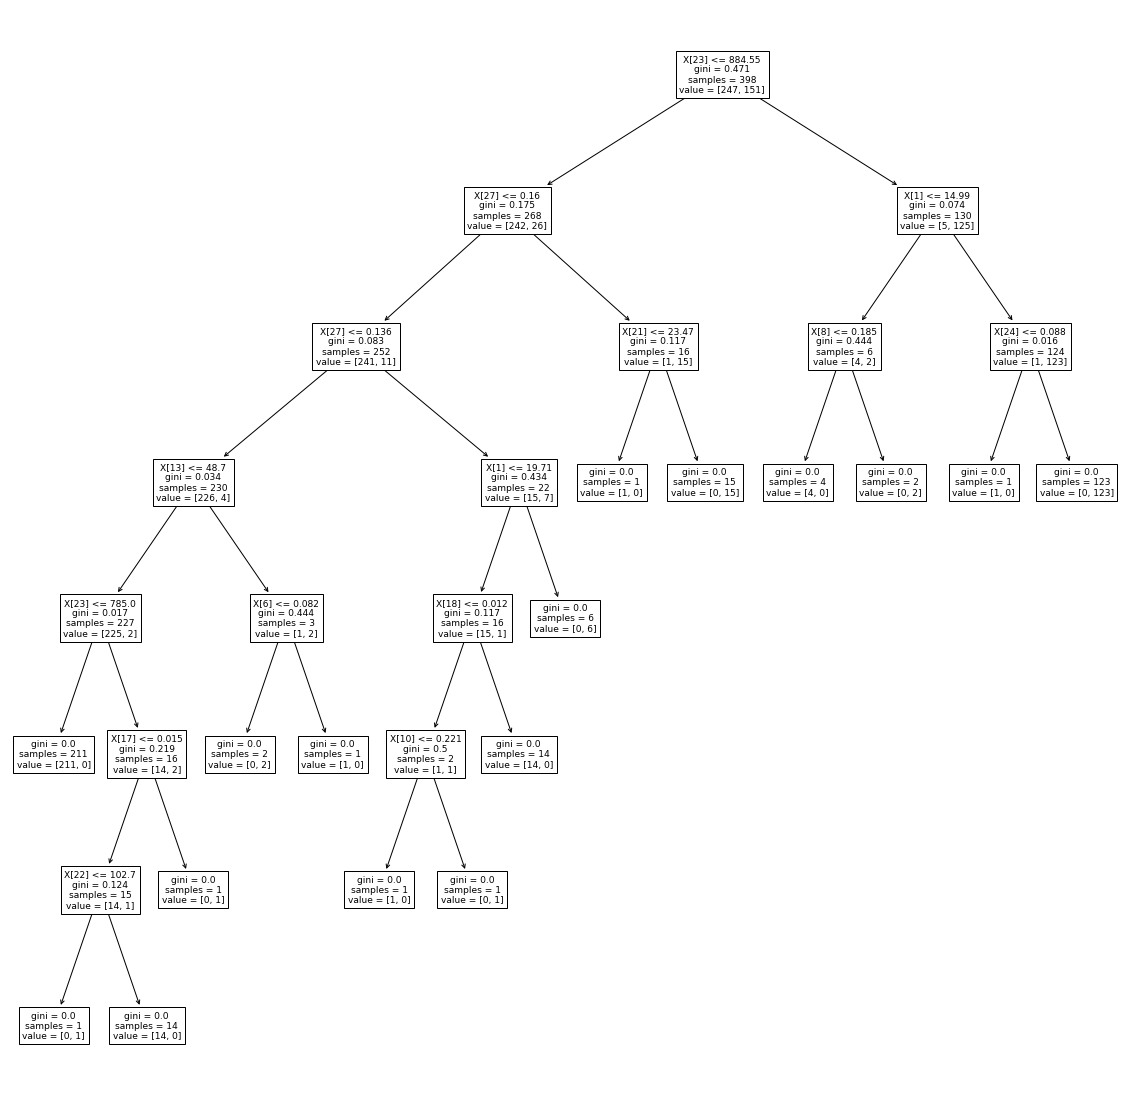

In [4]:
#Model plotting
plt.figure(figsize=(20,20))
tree.plot_tree(clf)
plt.show()

## Random Forest DATASET1

In [5]:
rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf.fit(X_train, np.ravel(y_train));
y_pred = rf.predict(X_test)


clf_report = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))
clf_report
accuracy_score(y_test, y_pred)

0.9649122807017544

## Hyperparameter Decision Tree DATASET1

In [6]:
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [2, 3, 5, 7, 9],
    'criterion': ["gini", "entropy"],
    'min_samples_split': [2, 3, 5, 7, 9]
}

grid_search = GridSearchCV(estimator=clf, param_grid=params, cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")
grid_search.fit(X_train, y_train)
grid_pred = grid_search.predict(X_test)
score = roc_auc_score(y_test, grid_pred)

print(grid_search.best_estimator_)
print(grid_search.score(X_test, y_test))
print(classification_report(y_test, grid_pred))

print(f"ROC AUC: {score:.4f}")

Fitting 4 folds for each of 250 candidates, totalling 1000 fits
DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=3,
                       min_samples_split=5)
0.9532163742690059
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       110
           1       0.96      0.90      0.93        61

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171

ROC AUC: 0.9417


## 10-Fold Cross Validation Decision Tree DATASET1

In [7]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold

pipeline = make_pipeline(StandardScaler(), DecisionTreeClassifier(random_state=1))

strtfdKFold = StratifiedKFold(n_splits=10)
kfold = strtfdKFold.split(X_train, y_train)
scores = []

for k, (train, test) in enumerate(kfold):
    pipeline.fit(X_train.iloc[train, :], y_train.iloc[train])
    score = pipeline.score(X_train.iloc[test, :], y_train.iloc[test])
    scores.append(score)
    print('Fold: %2d, Training/Test Split Distribution: %s, Accuracy: %.3f' % (k+1, np.bincount(y_train.iloc[train]), score))
    
print('\n\nCross-Validation accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))
print('\nList of possible accuracy:', scores)
print('\nMaximum Accuracy That can be obtained from this model is:', max(scores)*100, '%')
print('\nMinimum Accuracy:', min(scores)*100, '%')
print('\nOverall Accuracy:', (np.mean(scores)*100, '%'))
print('\nStandard Deviation is:', np.std(scores))
      

Fold:  1, Training/Test Split Distribution: [223 135], Accuracy: 0.900
Fold:  2, Training/Test Split Distribution: [222 136], Accuracy: 0.950
Fold:  3, Training/Test Split Distribution: [222 136], Accuracy: 0.975
Fold:  4, Training/Test Split Distribution: [222 136], Accuracy: 0.875
Fold:  5, Training/Test Split Distribution: [222 136], Accuracy: 0.975
Fold:  6, Training/Test Split Distribution: [222 136], Accuracy: 0.900
Fold:  7, Training/Test Split Distribution: [222 136], Accuracy: 0.925
Fold:  8, Training/Test Split Distribution: [222 136], Accuracy: 0.925
Fold:  9, Training/Test Split Distribution: [223 136], Accuracy: 0.872
Fold: 10, Training/Test Split Distribution: [223 136], Accuracy: 0.949


Cross-Validation accuracy: 0.925 +/- 0.036

List of possible accuracy: [0.9, 0.95, 0.975, 0.875, 0.975, 0.9, 0.925, 0.925, 0.8717948717948718, 0.9487179487179487]

Maximum Accuracy That can be obtained from this model is: 97.5 %

Minimum Accuracy: 87.17948717948718 %

Overall Accuracy: (

## Hyperparameter Random Forest DATASET1

In [8]:
param_grid = {
'max_depth': [10, 20, 30, 40, 50],
'max_features': ['auto','sqrt'],
'min_samples_leaf': [1, 2, 4],
'min_samples_split': [2, 5, 10],
'n_estimators': [200, 400, 600, 800, 1000]
}


rf = RandomForestClassifier(n_estimators = 100, random_state = 1)

# grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)
# grid_search.fit(train_features, train_labels)
# grid_search.best_params_
# clf = GridSearchCV(estimator = regr, param_grid = parameters, 
#                           cv = 10, n_jobs = -1, verbose = 2)
# clf.fit(X_train, np.ravel(y_train))

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")
grid_search.fit(X_train, np.ravel(y_train))

grid_pred = grid_search.predict(X_test)
score = roc_auc_score(y_test, grid_pred)

print(grid_search.best_estimator_)
print(grid_search.score(X_test, y_test))
print(classification_report(y_test, grid_pred))

print(f"ROC AUC: {score:.4f}")

Fitting 4 folds for each of 450 candidates, totalling 1800 fits
RandomForestClassifier(max_depth=10, min_samples_split=5, n_estimators=200,
                       random_state=1)
0.9590643274853801
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       110
           1       0.95      0.93      0.94        61

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171

ROC AUC: 0.9536


## 10-Fold Cross Validation Random Forest DATASET1

In [9]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold

pipeline = make_pipeline(StandardScaler(), RandomForestClassifier(n_estimators=100, max_depth=4))

strtfdKFold = StratifiedKFold(n_splits=10)
kfold = strtfdKFold.split(X_train, y_train)
scores = []

for k, (train, test) in enumerate(kfold):
    pipeline.fit(X_train.iloc[train, :], y_train.iloc[train])
    score = pipeline.score(X_train.iloc[test, :], y_train.iloc[test])
    scores.append(score)
    print('Fold: %2d, Training/Test Split Distribution: %s, Accuracy: %.3f' % (k+1, np.bincount(y_train.iloc[train]), score))
    
print('\n\nCross-Validation accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))
print('\nList of possible accuracy:', scores)
print('\nMaximum Accuracy That can be obtained from this model is:', max(scores)*100, '%')
print('\nMinimum Accuracy:', min(scores)*100, '%')
print('\nOverall Accuracy:', (np.mean(scores)*100, '%'))
print('\nStandard Deviation is:', np.std(scores))
      

Fold:  1, Training/Test Split Distribution: [223 135], Accuracy: 0.900
Fold:  2, Training/Test Split Distribution: [222 136], Accuracy: 0.950
Fold:  3, Training/Test Split Distribution: [222 136], Accuracy: 0.975
Fold:  4, Training/Test Split Distribution: [222 136], Accuracy: 0.975
Fold:  5, Training/Test Split Distribution: [222 136], Accuracy: 1.000
Fold:  6, Training/Test Split Distribution: [222 136], Accuracy: 0.925
Fold:  7, Training/Test Split Distribution: [222 136], Accuracy: 0.925
Fold:  8, Training/Test Split Distribution: [222 136], Accuracy: 0.975
Fold:  9, Training/Test Split Distribution: [223 136], Accuracy: 1.000
Fold: 10, Training/Test Split Distribution: [223 136], Accuracy: 0.923


Cross-Validation accuracy: 0.955 +/- 0.033

List of possible accuracy: [0.9, 0.95, 0.975, 0.975, 1.0, 0.925, 0.925, 0.975, 1.0, 0.9230769230769231]

Maximum Accuracy That can be obtained from this model is: 100.0 %

Minimum Accuracy: 90.0 %

Overall Accuracy: (95.48076923076924, '%')

St

## Decision Tree DATASET2


In [10]:
# Load libraries
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn import tree
from matplotlib import pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score


In [11]:
#Loading Dataset
df = pd.read_csv("project3_dataset2.txt",sep='\t',header=None)
df[4] = df[4].map( {'Present':1 , 'Absent':0} )
features_column  = df.iloc[: , :9]
X = features_column
y = df[9]
X

,0,1,2,3,4,5,6,7,8
0,132,6.20,6.47,36.21,1,62,30.77,14.14,45
1,123,0.05,4.61,13.69,0,51,23.23,2.78,16
2,128,0.50,3.70,12.81,1,66,21.25,22.73,28
3,114,9.60,2.51,29.18,0,49,25.67,40.63,46
4,150,0.30,6.38,33.99,1,62,24.64,0.00,50
...,...,...,...,...,...,...,...,...,...
457,114,4.08,4.59,14.60,1,62,23.11,6.72,58
458,136,2.80,2.53,9.28,1,61,20.70,4.55,25
459,138,4.50,2.85,30.11,0,55,24.78,24.89,56
460,170,7.60,5.50,37.83,1,42,37.41,6.17,54


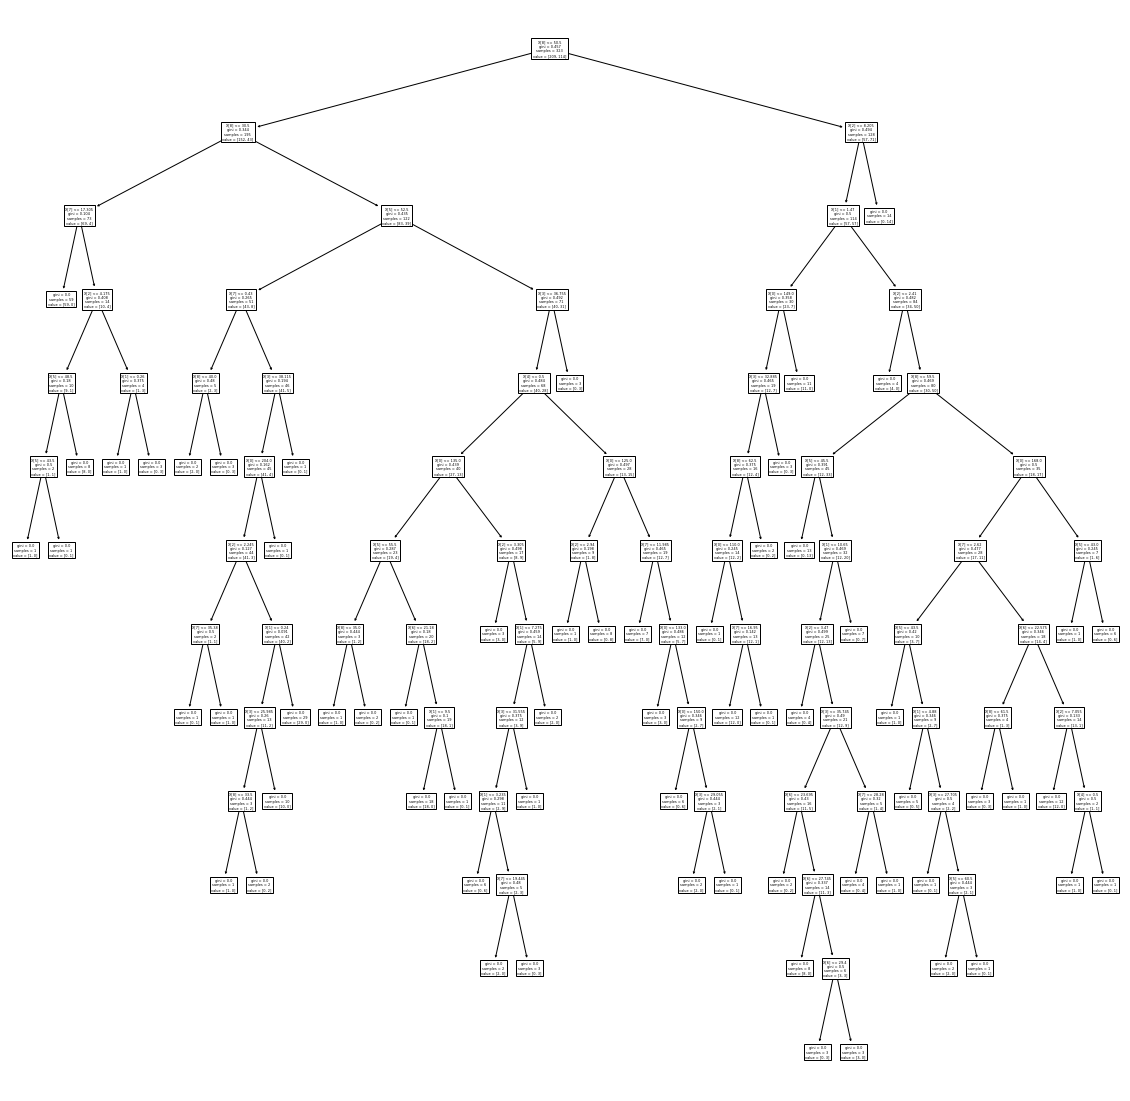

In [12]:
#Model training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)
clf_report = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))
clf_report

#Model plotting
plt.figure(figsize=(20,20))
tree.plot_tree(clf)
plt.show()

## Random Forest DATASET2

In [13]:
rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf.fit(X_train, np.ravel(y_train));
y_pred = rf.predict(X_test)


clf_report = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))
clf_report
accuracy_score(y_test, y_pred)

0.6906474820143885

## Hyperparameter Decision Tree DATASET2

In [14]:
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [2, 3, 5, 7, 9],
    'criterion': ["gini", "entropy"],
    'min_samples_split': [2, 3, 5, 7, 9]
}

grid_search = GridSearchCV(estimator=clf, param_grid=params, cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")
grid_search.fit(X_train, y_train)
grid_pred = grid_search.predict(X_test)
score = roc_auc_score(y_test, grid_pred)

print(grid_search.best_estimator_)
print(grid_search.score(X_test, y_test))
print(classification_report(y_test, grid_pred))

print(f"ROC AUC: {score:.4f}")

Fitting 4 folds for each of 250 candidates, totalling 1000 fits
DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=3,
                       min_samples_split=5)
0.6762589928057554
              precision    recall  f1-score   support

           0       0.70      0.90      0.79        93
           1       0.53      0.22      0.31        46

    accuracy                           0.68       139
   macro avg       0.61      0.56      0.55       139
weighted avg       0.64      0.68      0.63       139

ROC AUC: 0.5603


## 10-Fold Cross Validation Decision Tree DATASET2

In [15]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold

pipeline = make_pipeline(StandardScaler(), DecisionTreeClassifier(random_state=1))

strtfdKFold = StratifiedKFold(n_splits=10)
kfold = strtfdKFold.split(X_train, y_train)
scores = []

for k, (train, test) in enumerate(kfold):
    pipeline.fit(X_train.iloc[train, :], y_train.iloc[train])
    score = pipeline.score(X_train.iloc[test, :], y_train.iloc[test])
    scores.append(score)
    print('Fold: %2d, Training/Test Split Distribution: %s, Accuracy: %.3f' % (k+1, np.bincount(y_train.iloc[train]), score))
    
print('\n\nCross-Validation accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))
print('\nList of possible accuracy:', scores)
print('\nMaximum Accuracy That can be obtained from this model is:', max(scores)*100, '%')
print('\nMinimum Accuracy:', min(scores)*100, '%')
print('\nOverall Accuracy:', (np.mean(scores)*100, '%'))
print('\nStandard Deviation is:', np.std(scores))

Fold:  1, Training/Test Split Distribution: [188 102], Accuracy: 0.545
Fold:  2, Training/Test Split Distribution: [188 102], Accuracy: 0.667
Fold:  3, Training/Test Split Distribution: [188 102], Accuracy: 0.545
Fold:  4, Training/Test Split Distribution: [188 103], Accuracy: 0.688
Fold:  5, Training/Test Split Distribution: [188 103], Accuracy: 0.719
Fold:  6, Training/Test Split Distribution: [188 103], Accuracy: 0.625
Fold:  7, Training/Test Split Distribution: [188 103], Accuracy: 0.469
Fold:  8, Training/Test Split Distribution: [188 103], Accuracy: 0.625
Fold:  9, Training/Test Split Distribution: [188 103], Accuracy: 0.438
Fold: 10, Training/Test Split Distribution: [189 102], Accuracy: 0.594


Cross-Validation accuracy: 0.591 +/- 0.087

List of possible accuracy: [0.5454545454545454, 0.6666666666666666, 0.5454545454545454, 0.6875, 0.71875, 0.625, 0.46875, 0.625, 0.4375, 0.59375]

Maximum Accuracy That can be obtained from this model is: 71.875 %

Minimum Accuracy: 43.75 %

Ove

## Hyperparameter Random Forest DATASET2

In [16]:
param_grid = {
'max_depth': [10, 20, 30, 40, 50],
'max_features': ['auto','sqrt'],
'min_samples_leaf': [1, 2, 4],
'min_samples_split': [2, 5, 10],
'n_estimators': [200, 400, 600, 800, 1000]
}


rf = RandomForestClassifier(n_estimators = 100, random_state = 1)

# grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)
# grid_search.fit(train_features, train_labels)
# grid_search.best_params_
# clf = GridSearchCV(estimator = regr, param_grid = parameters, 
#                           cv = 10, n_jobs = -1, verbose = 2)
# clf.fit(X_train, np.ravel(y_train))

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")
grid_search.fit(X_train, np.ravel(y_train))

grid_pred = grid_search.predict(X_test)
score = roc_auc_score(y_test, grid_pred)

print(grid_search.best_estimator_)
print(grid_search.score(X_test, y_test))
print(classification_report(y_test, grid_pred))

print(f"ROC AUC: {score:.4f}")


Fitting 4 folds for each of 450 candidates, totalling 1800 fits
RandomForestClassifier(max_depth=10, min_samples_leaf=2, n_estimators=400,
                       random_state=1)
0.697841726618705
              precision    recall  f1-score   support

           0       0.74      0.84      0.79        93
           1       0.56      0.41      0.47        46

    accuracy                           0.70       139
   macro avg       0.65      0.63      0.63       139
weighted avg       0.68      0.70      0.68       139

ROC AUC: 0.6259


## 10-Fold Cross Validation Random Forest DATASET

In [17]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold

pipeline = make_pipeline(StandardScaler(), RandomForestClassifier(n_estimators=100, max_depth=4))

strtfdKFold = StratifiedKFold(n_splits=10)
kfold = strtfdKFold.split(X_train, y_train)
scores = []

for k, (train, test) in enumerate(kfold):
    pipeline.fit(X_train.iloc[train, :], y_train.iloc[train])
    score = pipeline.score(X_train.iloc[test, :], y_train.iloc[test])
    scores.append(score)
    print('Fold: %2d, Training/Test Split Distribution: %s, Accuracy: %.3f' % (k+1, np.bincount(y_train.iloc[train]), score))
    
print('\n\nCross-Validation accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))
print('\nList of possible accuracy:', scores)
print('\nMaximum Accuracy That can be obtained from this model is:', max(scores)*100, '%')
print('\nMinimum Accuracy:', min(scores)*100, '%')
print('\nOverall Accuracy:', (np.mean(scores)*100, '%'))
print('\nStandard Deviation is:', np.std(scores))


Fold:  1, Training/Test Split Distribution: [188 102], Accuracy: 0.667
Fold:  2, Training/Test Split Distribution: [188 102], Accuracy: 0.697
Fold:  3, Training/Test Split Distribution: [188 102], Accuracy: 0.667
Fold:  4, Training/Test Split Distribution: [188 103], Accuracy: 0.656
Fold:  5, Training/Test Split Distribution: [188 103], Accuracy: 0.750
Fold:  6, Training/Test Split Distribution: [188 103], Accuracy: 0.688
Fold:  7, Training/Test Split Distribution: [188 103], Accuracy: 0.656
Fold:  8, Training/Test Split Distribution: [188 103], Accuracy: 0.719
Fold:  9, Training/Test Split Distribution: [188 103], Accuracy: 0.656
Fold: 10, Training/Test Split Distribution: [189 102], Accuracy: 0.656


Cross-Validation accuracy: 0.681 +/- 0.031

List of possible accuracy: [0.6666666666666666, 0.696969696969697, 0.6666666666666666, 0.65625, 0.75, 0.6875, 0.65625, 0.71875, 0.65625, 0.65625]

Maximum Accuracy That can be obtained from this model is: 75.0 %

Minimum Accuracy: 65.625 %

Ove